# IMDB Movie Data EDA

**Authors:** Franko Ndou, Anthony Brocco

# Overview

IMDB has a SQL database containing vast movie data, this as well as two other CSV files that we have obtained will help us perform an EDA to help solve complex business problems. Our goal is to find the best performing films at the box office currently, and translate our findings into understandable data visualizaitons and recomendations. 

# Business Problem

Universal Pictures is looking to create the next big film, they have a massive budget to find the best directors, actors and business practices that will lead to not only the greatest film of our generation but the largest ROI possible. Our job is to perform an exploratory data analysis on large data sets to help Universal come to a conclusion on what is the best possible way to achieve this goal. 

# Creating the Production team

To make a best-selling film, you need a best-selling production team. We need to find out whos the best director and writer for the job. Actors are redundant as directors often write roles with certain actors in mind. Using data to find out the most successful actor will do nothing to help our production team make the best movie that they can. It is their artistic vision, using those statistics will not help us achieve a higher ROI and may negatively effect the film as well.

## Setting up the workspace

In [2]:
#Importing libraries
import pandas as pd
import sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings


# Ignores warnings 
warnings.filterwarnings("ignore")

In [3]:
# Creating data frames and establishing connections
budgets = pd.read_csv('../zippedData/movie_budget_cleaned.csv')
gross = pd.read_csv('../zippedData/gross_movie_cleaned.csv')
conn = sqlite3.connect('../zippedData/im.db')

In [4]:
# Finding directors with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN directors AS d ON mr.movie_id = d.movie_id
        JOIN persons AS p ON p.person_id = d.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
    
""", conn).head(10)

,movie,max_averagerating,numvotes
0,Christopher Nolan,8.6,1299334
1,Joss Whedon,8.1,1183655
2,James Gunn,8.1,948394
3,Tim Miller,8.0,820847
4,J.J. Abrams,8.0,784780
5,George Miller,8.1,780910
6,David Fincher,8.1,761592
7,David Yates,8.1,691835
8,Ridley Scott,8.0,680116
9,Éric Toledano,8.5,677343


In [5]:
# Finding writers with the highest rated movies as well as their rating
pd.read_sql("""
    SELECT movie, max_averagerating, numvotes
    FROM (
        SELECT p.primary_name AS movie, MAX(averagerating) AS max_averagerating, numvotes
        FROM movie_ratings AS mr
        JOIN writers AS w ON mr.movie_id = w.movie_id
        JOIN persons AS p ON p.person_id = w.person_id
        WHERE averagerating >= 8 AND numvotes > 2500
        GROUP BY p.primary_name, numvotes
    ) AS subquery
    GROUP BY movie
    ORDER BY numvotes DESC
""", conn).head(10)

,movie,max_averagerating,numvotes
0,David S. Goyer,8.4,1387769
1,Bob Kane,8.4,1387769
2,Jonathan Nolan,8.6,1299334
3,Christopher Nolan,8.6,1299334
4,Zak Penn,8.1,1183655
5,Joss Whedon,8.1,1183655
6,Terence Winter,8.2,1035358
7,Jordan Belfort,8.2,1035358
8,Laeta Kalogridis,8.1,1005960
9,Dennis Lehane,8.1,1005960


Observing the data we have, it seems like Christopher Nolan is one of the most critically acclaimed directors currently. He seems to be a fantastics writter as well. His Brother, Jonathan Nolan appears on the list as well. Im sure the two of them collaborate often but we should delve a little deeper into this data and see the box office performance and critical feedback of his movies

In [6]:
# Movies Christopher Nolan has directed
c_nolan_films = pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN directors AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn)
                            
c_nolan_films.head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Dunkirk,"Action,Drama,History",7.9,466580


In [7]:
# Movies Chrisopher Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Christopher Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Man of Steel,"Action,Adventure,Sci-Fi",7.1,647288
4,Dunkirk,"Action,Drama,History",7.9,466580


In [8]:
# Movies that Jonathan Nolan has written
pd.read_sql("""
    SELECT mb.primary_title AS movie, mb.genres, MAX(mr.averagerating) AS averagerating, MAX(mr.numvotes) AS numvotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
    JOIN writers AS d ON mb.movie_id = d.movie_id
    JOIN persons AS p ON p.person_id = d.Person_id
    WHERE p.primary_name = "Jonathan Nolan"
    GROUP BY mb.primary_title, mb.genres
    ORDER BY MAX(mr.numvotes) DESC
""", conn).head()

,movie,genres,averagerating,numvotes
0,The Dark Knight Rises,"Action,Thriller",8.4,1387769
1,Interstellar,"Adventure,Drama,Sci-Fi",8.6,1299334


It seems like there is some overlap but not entirely, We should check the ROI of the average Christopher Nolan Film as well as the budget and gross of each film

In [9]:
# Merging dataframes to check for ROI
c_nolan_films = budgets.merge(c_nolan_films)
pd.set_option('display.float_format', '{:.2f}'.format)
c_nolan_films.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI,averagerating,numvotes
count,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00
mean,111.50,37.50,187500000.00,279700367.00,771545121.00,3.13,8.43,1248687.25
std,69.58,23.98,58665719.69,122443157.23,249586963.97,0.79,0.39,572862.16
min,10.00,11.00,150000000.00,188017894.00,499837368.00,2.33,7.90,466580.00
25%,100.75,26.75,157500000.00,189555683.50,624743873.25,2.79,8.28,1091145.50
50%,134.00,35.00,162500000.00,241322237.50,750952008.50,2.99,8.50,1343551.50
75%,144.75,45.75,192500000.00,331466921.00,897753256.25,3.33,8.65,1501093.25
max,168.00,69.00,275000000.00,448139099.00,1084439099.00,4.22,8.80,1841066.00


The tables tell us that his films tend to have a massive return on investment. We can assume that if he was given a large budget, he would be able to make the best out of it. However its better to be confident than to assume.

- The average Christopher Nolan film has a budget of $162,500,000.


- The average Christopher Nolan film has a worldwide gross of $750,952,008

- The average Christopher Nolan film has a ROI of 3.13

This tells us a decent amount about what his films are capable of however its better to do a confidence test and truely see if hes worth betting on.

## Hypothesis testing

By simply looking at this data, we can come to the assumption that Christopher Nolan is a great director however its better to see how confident we can be in this hypothesis rather than making assumptions on what we can see through visualizations. Mathmatically we can *prove* or disprove this hypothesis that Christopher Nolan will generate a higher ROI than other directors

Lets start with a T-test

In [10]:
# Filtering for high budget blockbuster movies
high_budgets = budgets[budgets['production_budget'] >= 50000000]
high_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279,5.53
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-0.57
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,3.24
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,3.15
...,...,...,...,...,...,...,...,...
1203,1203,4,2013-03-15,Upside Down,50000000,102118,26387039,-0.47
1204,1204,5,2015-10-02,Shanghai,50000000,46425,15505922,-0.69
1205,1205,6,2020-12-31,Hannibal the Conqueror,50000000,0,0,-1.00
1206,1206,7,2019-11-08,Arctic Dogs,50000000,0,0,-1.00


In [11]:
#Finding population mean
high_budgets.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,ROI
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,603.50,50.20,95629935.13,110600357.39,277832885.52,1.74
std,348.86,29.02,50501519.28,105313709.24,288919210.23,2.24
min,0.00,1.00,50000000.00,0.00,0.00,-1.00
25%,301.75,25.00,60000000.00,40828757.25,88703366.25,0.20
50%,603.50,50.00,80000000.00,78368442.50,184531488.00,1.23
75%,905.25,75.00,116250000.00,143551416.50,356218532.50,2.62
max,1207.00,100.00,425000000.00,936662225.00,2776345279.00,15.49


In [12]:
# Performing T test
stats.ttest_1samp(c_nolan_films['ROI'], 1.74)

Ttest_1sampResult(statistic=3.5295998983514654, pvalue=0.038650297441573986)

Given the sample set that we have, there is a 3.8% chance that Christopher Nolan films will not have an ROI of 1.74 or higher. Meaning it is incredibly likely (96.2% chance) that Christopher Nolan will generate a return on investment for us 

If possible we should most definitely employee him as the director and writer of our film, should he want to work with his brother that would be entirely acceptable as well due to his own success within the industry.

# Which Genres have the largest ROI?

In [13]:
# Setting a threshold for 'successful' movies
df_successful = budgets[budgets['ROI'] > 1]
# Reading in our cleaned basics dataframe
df_basics = pd.read_csv('../zippedData/movie_basics_cleaned.csv',index_col = 0)

In [14]:
# Drop 'movie_id' column from df_basics
df_basics = df_basics.drop('movie_id', axis=1)

# Drop 'id' column from df_successful
df_successful = df_successful.drop('id', axis=1)

# Merge the DataFrames using 'movie' column from df_successful and 'primary_title'
merged_df = pd.merge(df_successful, df_basics, left_on='movie', right_on='primary_title', how='inner')

# Create a new DataFrame by combining 'primary_title' and 'original_title'
merged_df['title'] = merged_df['primary_title'].combine_first(merged_df['original_title'])

# Drop 'primary_title' and 'original_title' columns
merged_df = merged_df.drop(['primary_title', 'original_title'], axis=1)

#Create 'successful_movies' dataframe and clean out unneccesary columns or duplicates
successful_movies_df = merged_df.drop(['title', 'start_year'],axis = 1).drop_duplicates(subset = 'movie')

#Filtering for movies with budget greater than $50 Mil to make it more relevant to our budget
relevant_movies_df = successful_movies_df[successful_movies_df['production_budget'] > 50000000]

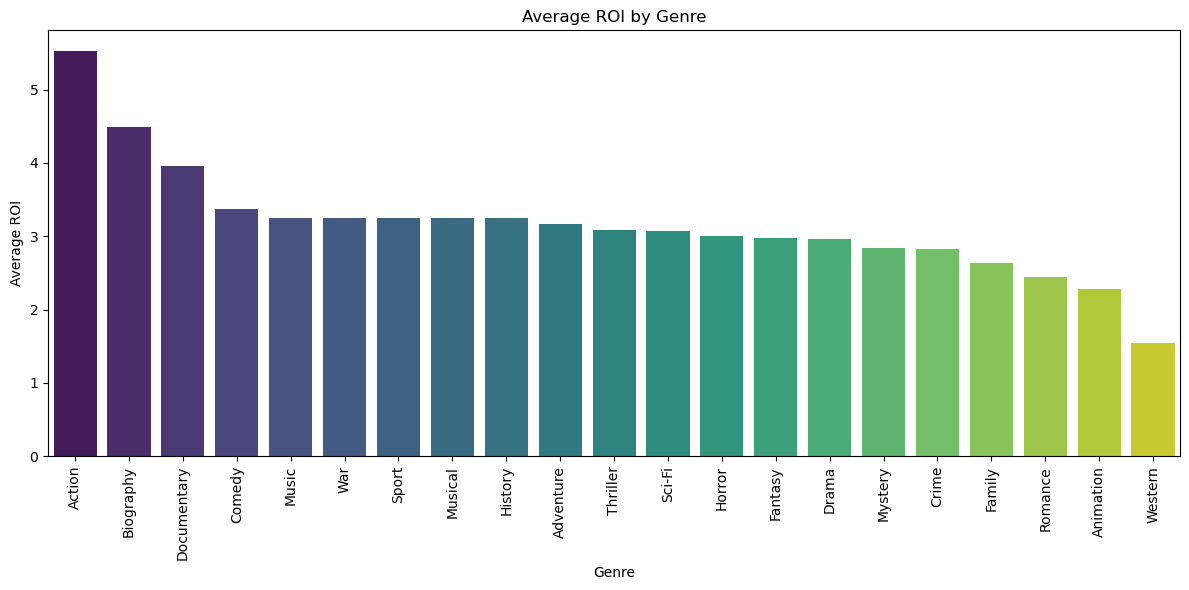

In [15]:
# Here i preprocessed the genres column using the split and stack functions, and then resetting the index
genres_df = relevant_movies_df['genres'].str.split(',', expand=True).stack().reset_index(level=0, drop=True).rename('genre')
merged_df = relevant_movies_df.drop('genres', axis=1).join(genres_df).sort_values(by='ROI', ascending = False)

# Calculate average ROI for each genre
genre_roi_avg = merged_df.groupby('genre')['ROI'].mean().reset_index().sort_values(by='ROI', ascending = False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_roi_avg, x='genre', y='ROI', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.tight_layout()
plt.show()

It looks like action movies have the largest ROI per genre by far. This lines up perfectly for us as we are looking to work with a director that has a strong background in this genre. The other genres almost seem indifferent to each other but if we are looking to make the next best film, clearly most consumers want to see another action movie so we think pursuing an action film would be the best business decision 

# Best time to release films

In [16]:
# Creating new column day of the week
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['day_of_the_week'] = budgets['release_date'].dt.strftime("%A")
budgets['domestic_gross_in_mill'] = budgets['domestic_gross'] / 1000000

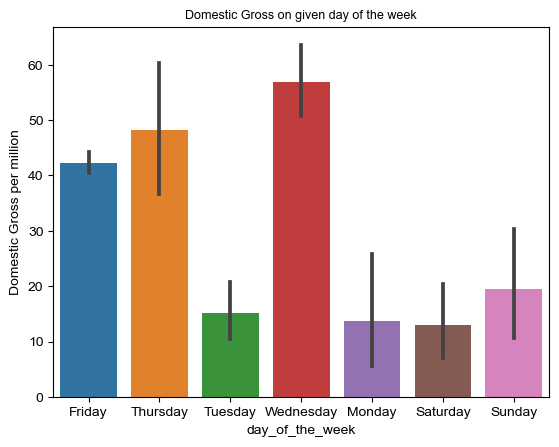

In [17]:

# Create bars
sns.barplot(x = 'day_of_the_week', y = 'domestic_gross_in_mill', data = budgets)
sns.set(font_scale=0.75)

# Show graphic
plt.ylabel('Domestic Gross per million')
plt.title('Domestic Gross on given day of the week')
plt.show()

It appears that Wednesday is the optimal day for us to release our movie, and this choice is supported by a significant margin. We should aim to release it during a wednesday or thursday if possible.

We should also check which Month has the highest domestic gross.

In [18]:
# Creating new column Month of the year
budgets['release_date'] = pd.to_datetime(budgets['release_date'])
budgets['month_of_the_year'] = budgets['release_date'].dt.strftime('%B')

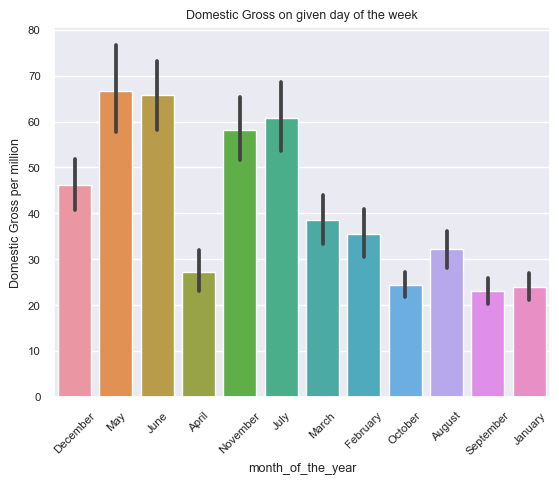

In [19]:
#Plotting
sns.barplot(x = 'month_of_the_year', y = 'domestic_gross_in_mill', data = budgets)
sns.set(font_scale=0.75)
plt.xticks(rotation=45)

# Show graphic
plt.ylabel('Domestic Gross per million')
plt.title('Domestic Gross on given day of the week')
plt.show()

The summer months are the best time to release our movie, specifically within June, July, and May. Contexually this makes sense given that students are free during the summer and most families tend to take this time to go out as well. During the winter months, nobody wants to drive out to watch a movie. During summer we have a larger audiance pool and the weather doesnt discourage anyone from seeing our movie.

# Finding the right muscian for the score

When was the last time you watched a movie with no music? The score of a movie is so incredibly important and often times its taken for granted by audiances. However if a movie had no soundtrack it would feel incredibly awkward and take us out of the moment. Music is an amplifier, a bad soundtrack with reinforce negative opnions towards the film but a great soundtrack can truly encapsulate the audiance and bring them to where the director is trying to take them. Its crucial we find someone who is a gifted musician that has a reputation with working on best-selling films

In [20]:
# Selecting individuals for filtering
people_and_movies_df = pd.read_sql("""
    SELECT p.person_id, primary_name, primary_profession, primary_title, original_title, genres
    FROM persons AS p
    INNER JOIN known_for AS k ON p.person_id = k.person_id
    INNER JOIN movie_basics AS m ON k.movie_id = m.movie_id;
""", conn)

In [25]:
# Merge two DataFrames 'merged_df' and 'people_and_movies_df' using an outer join
relevant_people_and_movies = pd.merge(merged_df, people_and_movies_df, how='outer', left_on='movie', right_on='original_title')

# Drop columns we don't need
relevant_people_and_movies = relevant_people_and_movies.drop(['release_date',
  'runtime_minutes', 'original_title', 'genre'], axis=1)

# Sort the DataFrame by 'ROI' in descending order
relevant_people_and_movies = relevant_people_and_movies.sort_values(by='ROI', ascending=False)

# Drop rows with missing 'primary_profession' values
relevant_people_and_movies = relevant_people_and_movies.dropna(subset=['primary_profession'])

# Filter the DataFrame based on primary profession
chosen_artists = relevant_people_and_movies[relevant_people_and_movies['primary_profession'].str.contains \
                                                  ('soundtrack|composer|music_department|sound_deparment')]
# Select relevant columns
chosen_artists = chosen_artists[['primary_name', 'primary_profession', 'ROI', 'averagerating', 'numvotes']]

# Drop duplicate rows, if any
chosen_artists = chosen_artists.drop_duplicates()

# Sort by 'ROI' in descending order 
chosen_artists = chosen_artists.sort_values(by='averagerating', ascending=False)

# Chose only 'successful' artists by setting the roi to 2 as well as the minimum rating to 7 and display final result
chosen_artists = chosen_artists[chosen_artists['ROI'] > 1.74]
chosen_artists = chosen_artists[chosen_artists['numvotes'] > 10000]
chosen_artists[chosen_artists['averagerating'] >= 7]

,primary_name,primary_profession,ROI,averagerating,numvotes
2745,Sam Estes,"music_department,composer,executive",4.22,8.80,1841066.00
2770,Andrew Kawczynski,"music_department,composer",4.22,8.80,1841066.00
2743,Bruce Fowler,"music_department,soundtrack,composer",4.22,8.80,1841066.00
2765,Ann Marie Calhoun,"music_department,soundtrack,actress",4.22,8.80,1841066.00
2746,Satnam Ramgotra,"music_department,soundtrack,composer",4.22,8.80,1841066.00
...,...,...,...,...,...
27102,John Deacon,"soundtrack,composer,actor",2.65,7.00,657690.00
27105,John Debney,"music_department,composer,soundtrack",2.65,7.00,657690.00
27090,Mick Jones,"soundtrack,music_department,actor",2.65,7.00,657690.00
27088,Lisbeth Scott,"music_department,composer,soundtrack",2.65,7.00,657690.00


This is a list of all high performing all musicians with a positive ROI within the mean of a high budget film. We chose to filter for critically aclaimed musicans as well to make sure that we could trust that the soundtrack was in good hands

# Backup directors

In [21]:
# Merge two DataFrames 'merged_df' and 'people_and_movies_df' using an outer join
relevant_people_and_movies = pd.merge(merged_df, people_and_movies_df, how='outer', left_on='movie', right_on='original_title')

# Drop columns we don't need
relevant_people_and_movies = relevant_people_and_movies.drop(['release_date', 'numvotes',
  'runtime_minutes', 'original_title', 'genre'], axis=1)

# Sort the DataFrame by 'averagerating' in descending order (changed from 'ROI')
relevant_people_and_movies = relevant_people_and_movies.sort_values(by='averagerating', ascending=False)

# Drop rows with missing 'primary_profession' values
relevant_people_and_movies = relevant_people_and_movies.dropna(subset=['primary_profession'])

# Filter the DataFrame based on primary profession (director)
chosen_directors = relevant_people_and_movies[relevant_people_and_movies['primary_profession'].str.contains('director')]

# Select relevant columns
chosen_directors = chosen_directors[['primary_name', 'primary_profession', 'averagerating']]

# Drop duplicate rows, if any
chosen_directors = chosen_directors.drop_duplicates()

# Sort by 'averagerating' in descending order (optional)
chosen_directors = chosen_directors.sort_values(by='averagerating', ascending=False)

# Filtering for above 7 rating
chosen_directors_filtered = chosen_directors[chosen_directors['averagerating'] >= 7.0]

# Display the directors with the highest ratings
chosen_directors_filtered.dropna().reset_index()

,index,primary_name,primary_profession,averagerating
0,2772,Alexandre Ottoveggio,"actor,stunts,director",8.80
1,2706,James P. Lay,"sound_department,writer,director",8.80
2,2748,Talulah Riley,"actress,director,writer",8.80
3,2712,Kevin Westley,"assistant_director,location_management,miscell...",8.80
4,2713,Chris Patterson,"cinematographer,camera_department,director",8.80
...,...,...,...,...
1430,28843,Jason Nardella,"art_department,director,editor",7.00
1431,29891,Oleg Hill,"actor,director,producer",7.00
1432,28557,Paul Hayes,"assistant_director,miscellaneous,producer",7.00
1433,28558,James Corker,"art_department,art_director,production_designer",7.00


This is a list of all sutiable directors assuming were unable to work with our perffered choice.

# Conclusion